<a href="https://colab.research.google.com/github/coderzaman/Knowledge-Engineering/blob/master/Knowledge_Engineering_Lab_Task_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Weighted Graph

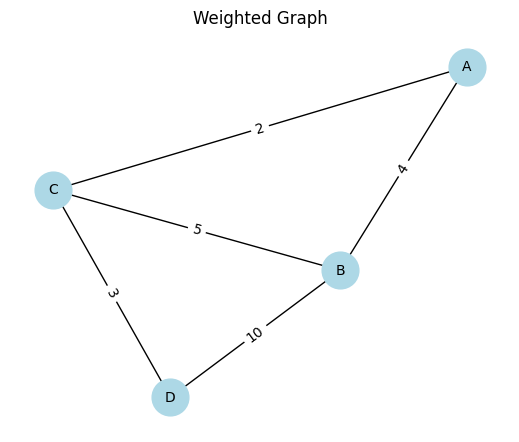

In [63]:
G_weighted = nx.Graph()
G_weighted.add_weighted_edges_from([
    ('A', 'B', 4),
    ('A', 'C', 2),
    ('B', 'C', 5),
    ('B', 'D', 10),
    ('C', 'D', 3)
])

pos = nx.spring_layout(G_weighted)
weights = nx.get_edge_attributes(G_weighted, 'weight')
plt.figure(figsize=(5, 4))
nx.draw(G_weighted, pos, with_labels=True, node_color='lightblue', node_size=700, font_size=10)
nx.draw_networkx_edge_labels(G_weighted, pos, edge_labels=weights)
plt.title("Weighted Graph")
plt.show()


# MultiGraph (Multi-Edge) Example

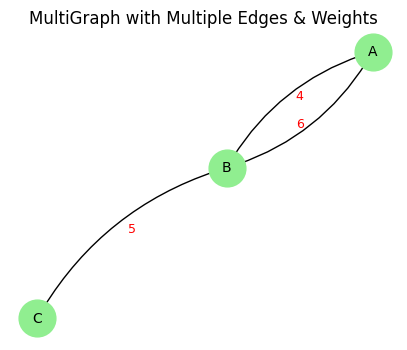

In [64]:
G_multi = nx.MultiGraph()
G_multi.add_edge('A', 'B', weight=4)
G_multi.add_edge('A', 'B', weight=6)
G_multi.add_edge('B', 'C', weight=5)

pos = nx.spring_layout(G_multi, seed=42)

plt.figure(figsize=(5, 4))


nx.draw_networkx_nodes(G_multi, pos, node_color='lightgreen', node_size=700)
nx.draw_networkx_labels(G_multi, pos, font_size=10)

edge_styles = {
    0: 'arc3,rad=0.2',   # first parallel edge
    1: 'arc3,rad=-0.2',  # second parallel edge (opposite curve)
}

for u, v, key, data in G_multi.edges(keys=True, data=True):
    rad = edge_styles.get(key, 'arc3,rad=0.0')  # straight if no parallel
    nx.draw_networkx_edges(G_multi, pos, edgelist=[(u, v)],
                           connectionstyle=rad, edge_color='black')

    mid_pos = ((pos[u][0] + pos[v][0]) / 2,
               (pos[u][1] + pos[v][1]) / 2 + (0.1 if rad == 'arc3,rad=0.2' else -0.1))
    plt.text(mid_pos[0], mid_pos[1], str(data['weight']),
             fontsize=9, color='red', ha='center', va='center')

plt.title("MultiGraph with Multiple Edges & Weights")
plt.axis('off')
plt.show()

# Shortest Path in Weighted Graph

In [65]:
shortest_path = nx.shortest_path(G_weighted, source='A', target='D', weight='weight')
shortest_distance = nx.shortest_path_length(G_weighted, source='A', target='D', weight='weight')
print(f"Shortest path from A to D: {shortest_path}")
print(f"Shortest path length: {shortest_distance}")

Shortest path from A to D: ['A', 'C', 'D']
Shortest path length: 5


# 1 undirected graphs
*   Adjacency Matrix
*   Adjacency List



Undirected Graphs:


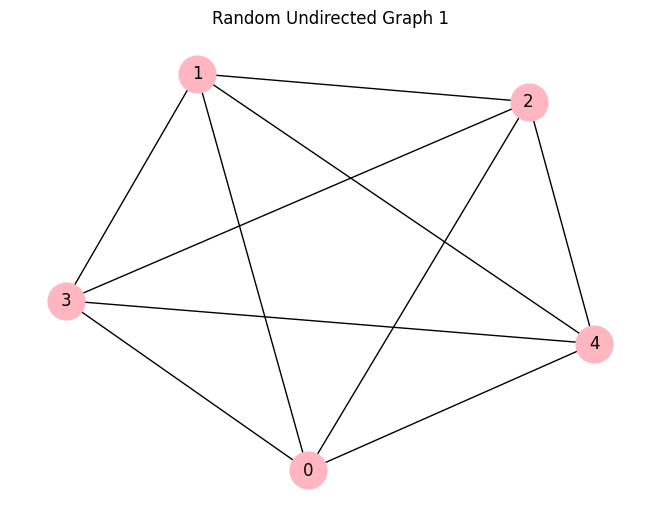

Adjacency Matrix of Graph 1:
[[0 1 1 1 1]
 [1 0 1 1 1]
 [1 1 0 1 1]
 [1 1 1 0 1]
 [1 1 1 1 0]]

Adjacency List of Graph 1:
  Node 0: [1, 2, 3, 4]
  Node 1: [0, 2, 3, 4]
  Node 2: [0, 1, 3, 4]
  Node 3: [0, 1, 2, 4]
  Node 4: [0, 1, 2, 3]
-------------------------


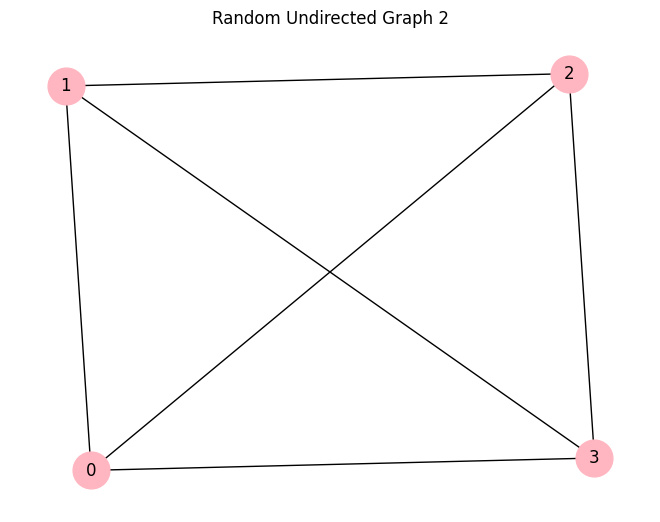

Adjacency Matrix of Graph 2:
[[0 1 1 1]
 [1 0 1 1]
 [1 1 0 1]
 [1 1 1 0]]

Adjacency List of Graph 2:
  Node 0: [1, 2, 3]
  Node 1: [0, 2, 3]
  Node 2: [0, 1, 3]
  Node 3: [0, 1, 2]
-------------------------


In [66]:
import networkx as nx
import matplotlib.pyplot as plt
import random
random.seed(3031)
print("Undirected Graphs:")
for i in range(2):
    nodes = random.randint(3, 5)
    edges = random.randint(nodes, nodes * 2)

    G_rand = nx.gnm_random_graph(nodes, edges, seed=3031 + i)

    plt.figure()
    pos = nx.spring_layout(G_rand, seed=3031)
    nx.draw(G_rand, pos, with_labels=True, node_color='lightpink', node_size=700)
    plt.title(f"Random Undirected Graph {i+1}")
    plt.show()

    # --- Adjacency Matrix ---
    print(f"Adjacency Matrix of Graph {i+1}:")
    adj_matrix = nx.to_numpy_array(G_rand, dtype=int)
    print(adj_matrix)

    # --- Adjacency List (New Code) ---
    print(f"\nAdjacency List of Graph {i+1}:")
    for node, neighbors in G_rand.adjacency():
        # The neighbors object is a dictionary, we just need the keys
        neighbor_list = list(neighbors.keys())
        print(f"  Node {node}: {neighbor_list}")

    print("-" * 25)

# 2 directed graphs

*   Incidence Matrix
*   Adjacency Matrix






Directed Graphs:


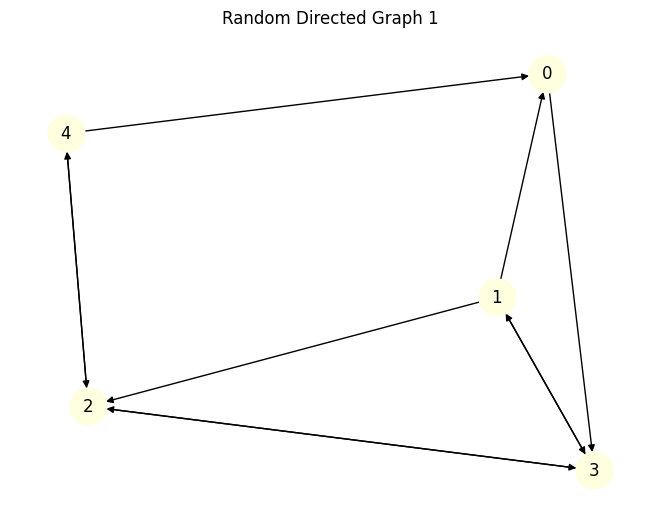


Incidence Matrix of Directed Graph 1:
[[-1  1  0  0  0  0  0  0  1  0]
 [ 0 -1 -1 -1  0  0  0  1  0  0]
 [ 0  0  0  1 -1 -1  1  0  0  1]
 [ 1  0  1  0  1  0 -1 -1  0  0]
 [ 0  0  0  0  0  1  0  0 -1 -1]]
Adjacency Matrix of Directed Graph 1:
[[0 0 0 1 0]
 [1 0 1 1 0]
 [0 0 0 1 1]
 [0 1 1 0 0]
 [1 0 1 0 0]]
------------------------------


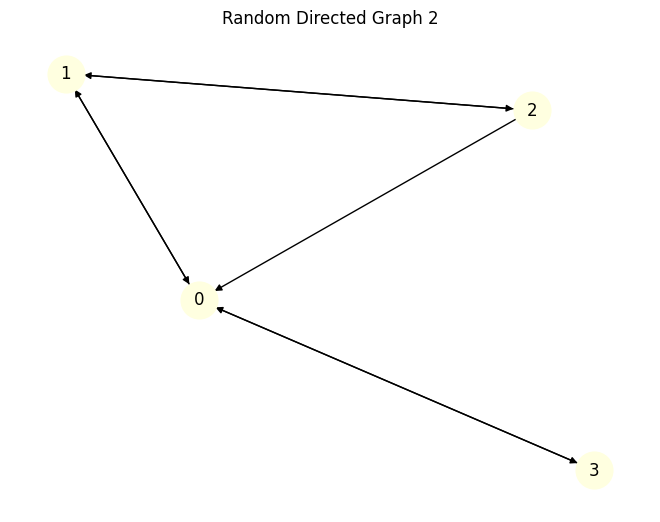


Incidence Matrix of Directed Graph 2:
[[-1 -1  0  1  1  0  1]
 [ 0  1 -1 -1  0  1  0]
 [ 0  0  1  0 -1 -1  0]
 [ 1  0  0  0  0  0 -1]]
Adjacency Matrix of Directed Graph 2:
[[0 1 0 1]
 [1 0 1 0]
 [1 1 0 0]
 [1 0 0 0]]
------------------------------


In [68]:
import random

random.seed(3031) # Seed Python's random module

print("Directed Graphs:")
for i in range(2):
    nodes = random.randint(3, 5)
    edges = random.randint(nodes, nodes * 2)

    # Use seed for reproducibility
    G_rand_dir = nx.gnm_random_graph(nodes, edges, directed=True, seed=3031 + i)

    plt.figure()
    pos = nx.spring_layout(G_rand_dir, seed=3031) # fixed layout
    nx.draw(G_rand_dir, pos, with_labels=True,
            node_color='lightyellow', node_size=700, arrows=True)
    plt.title(f"Random Directed Graph {i+1}")
    plt.show()

    # --- Incidence Matrix ---
    # Convert sparse matrix to a dense array for printing
    # For directed graphs: -1 for tail, 1 for head
    print(f"\nIncidence Matrix of Directed Graph {i+1}:")
    inc_matrix = nx.incidence_matrix(G_rand_dir, oriented=True, dtype=int).toarray()
    print(inc_matrix)

    # --- Adjacency Matrix ---
    print(f"Adjacency Matrix of Directed Graph {i+1}:")
    adj_matrix = nx.to_numpy_array(G_rand_dir, dtype=int)
    print(adj_matrix)

    print("-" * 30)